In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,cohen_kappa_score,roc_curve, auc,accuracy_score,confusion_matrix,f1_score,precision_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


Train=pd.read_csv("exoTrain.csv")
Test=pd.read_csv("exoTest.csv")

Data was already split into Train and Test data and provided in 2 different excel files. 

In [4]:
Train.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
Test.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [6]:
Train.describe()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


In [9]:
Train.dtypes

LABEL          int64
FLUX.1       float64
FLUX.2       float64
FLUX.3       float64
FLUX.4       float64
              ...   
FLUX.3193    float64
FLUX.3194    float64
FLUX.3195    float64
FLUX.3196    float64
FLUX.3197    float64
Length: 3198, dtype: object

**Missing Data:**
below we check for missing data in case we need to apply some sort of encoder. 

as you can see there is no missing data in neither one of the data sets

In [52]:
print('Missing Data in Training set: ', Train.isnull().sum().sum())
print('Missing Data in Test set: ', Test.isnull().sum().sum())

Missing Data in Training set:  0
Missing Data in Test set:  0


**Plotting Sample Data:**
in order to get a better idea of what the data looks like.

**Scaling:**
as we can see with the graph below, the range of data is vast. going from anywhere from -500000 all the way to 1500000. and it seems like the purple line (flux 5) has a much different scale than some of the other line. using a MinMaxScaler() should help fix this and make the data more consistent across all features.

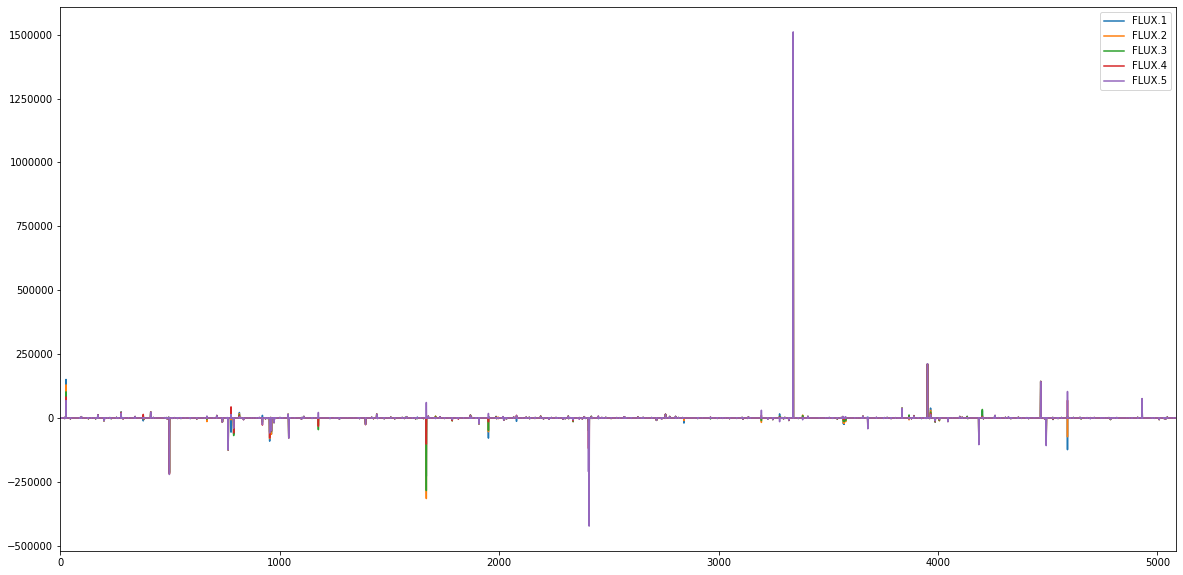

In [10]:
sample = Train[['FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']]
sample.plot(figsize=(20,10))

In [11]:
cont_vars = list(Train.drop(['LABEL'],1).columns)

In [12]:
#NUMERICAL PIPELINE: scaling
num_scl_step = ('scale', MinMaxScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, cont_vars)]

In [13]:
ct = ColumnTransformer(transformers=num_transformers)
ct.fit(Train[cont_vars])
X_train = ct.transform(Train[cont_vars])
ct.fit(Test[cont_vars])
X_test = ct.transform(Test[cont_vars])


y_train = Train['LABEL'].values
y_test = Test['LABEL'].values

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5087, 3197) (570, 3197) (5087,) (570,)


As you can see below the data is much easier to visualize with a more consistent scale between the features. this will also help us in our predictive models.

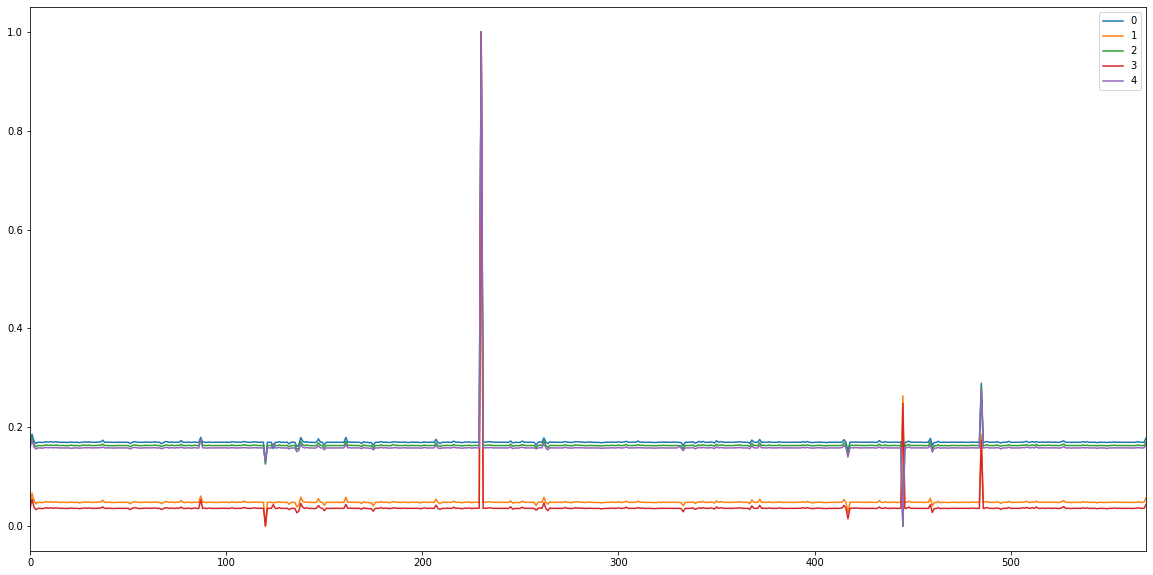

In [15]:
random = pd.DataFrame(data=X_test)
sample2  = random.iloc[:, 0:5]
sample2.plot(figsize=(20,10))

**Principal Component Analysis:**
below we use PCA to determine number of components to achieve 95% cumulative explained variation

In [18]:
pca = PCA(.95)

pca.fit(X_train)

print('Cumulative explained variation: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation: 0.9575563848002246


As you can see below 11 components explain 95% of the variance. 

we now use this to transform the data feature data for both the training and test set.

In [19]:
pca.n_components_

11

In [20]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

**Logistic Regression Model**

In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs')

logisticRegr.fit(X_train_pca,y_train)

y_pred1=logisticRegr.predict(X_test_pca)

Accuracy Score for Logistic Regression: 99.12 %
ROC AUC: 0.5
Precision Score: 0.9912280701754386
Recall Score: 1.0
F1 Score: 0.9955947136563876


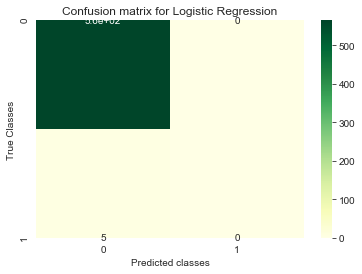

In [45]:
sns.set_style("whitegrid")


print('Accuracy Score for Logistic Regression:'\
      , round(accuracy_score(y_test, y_pred1)*100, 2), '%')
print('ROC AUC:'\
     ,roc_auc_score(y_test,y_pred1))
print('Precision Score:'\
     ,precision_score(y_test,y_pred1))
print('Recall Score:'\
     ,recall_score(y_test,y_pred1))
print('F1 Score:'\
     ,f1_score(y_test,y_pred1))
plt.title('Confusion matrix for Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

**Gradient Boosting Regression Model**

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn import ensemble

gbes = ensemble.GradientBoostingRegressor(n_estimators=100)
gbes.fit(X_train, y_train)
mean_squared_error(gbes.predict(X_test), y_test)

0.016807065598828674

In [36]:
y_pred2 = gbes.predict(X_test).round()

Accuracy Score for Logistic Regression: 98.95 %
ROC AUC: 0.49911504424778763
Precision Score: 0.9912126537785588
Recall Score: 0.9982300884955753
F1 Score: 0.9947089947089948


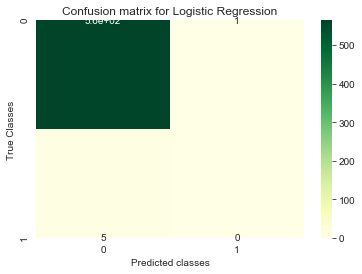

In [44]:
print('Accuracy Score for Logistic Regression:'\
      , round(accuracy_score(y_test, y_pred2)*100, 2), '%')
print('ROC AUC:'\
     ,roc_auc_score(y_test,y_pred2))
print('Precision Score:'\
     ,precision_score(y_test,y_pred2))
print('Recall Score:'\
     ,recall_score(y_test,y_pred2))
print('F1 Score:'\
     ,f1_score(y_test,y_pred2))
plt.title('Confusion matrix for Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

**EXTRA Work (Don't necessarily have to include in assignment**

i was just trying out a couple of things did this. don't have to include it in the model. 

/Users/wfaizi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 0, 'Relative Importance')

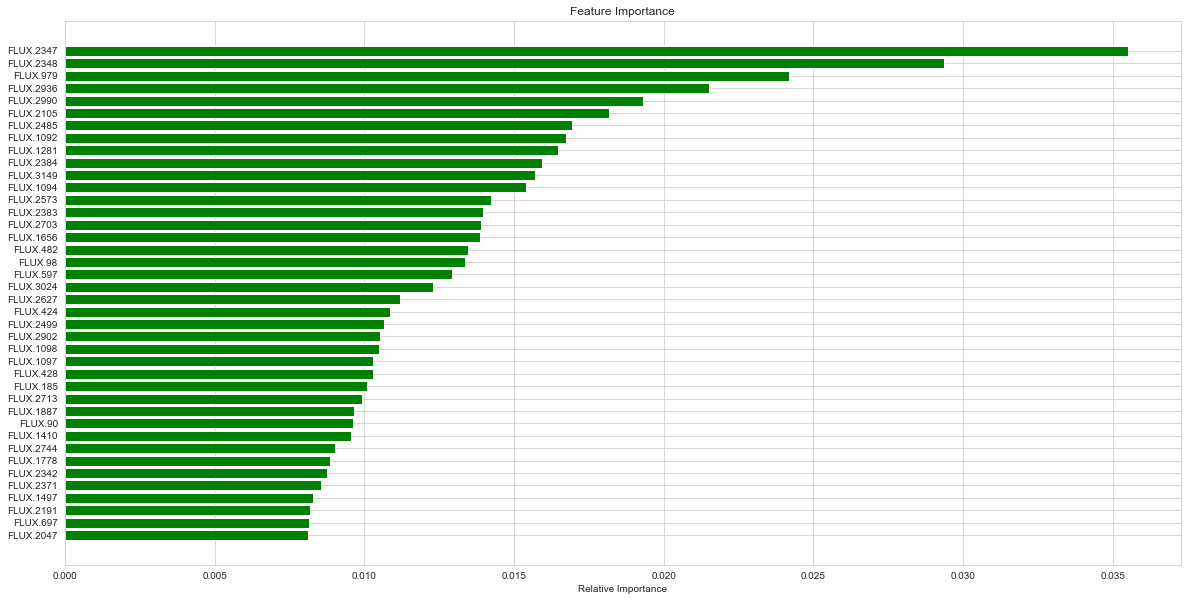

In [53]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[-40:]

plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [Train.columns[i] for i in indices])
plt.xlabel('Relative Importance')

In [54]:
#The 40 flux numbers below are the top 40 important fluxes that explain most of the variances
print('The following Flux numbers are the top 40 most important and explain most of the variances: \n\n',
      [Train.columns[i] for i in indices])

The following Flux numbers are the top 40 most important and explain most of the variances: 

 ['FLUX.2047', 'FLUX.697', 'FLUX.2191', 'FLUX.1497', 'FLUX.2371', 'FLUX.2342', 'FLUX.1778', 'FLUX.2744', 'FLUX.1410', 'FLUX.90', 'FLUX.1887', 'FLUX.2713', 'FLUX.185', 'FLUX.428', 'FLUX.1097', 'FLUX.1098', 'FLUX.2902', 'FLUX.2499', 'FLUX.424', 'FLUX.2627', 'FLUX.3024', 'FLUX.597', 'FLUX.98', 'FLUX.482', 'FLUX.1656', 'FLUX.2703', 'FLUX.2383', 'FLUX.2573', 'FLUX.1094', 'FLUX.3149', 'FLUX.2384', 'FLUX.1281', 'FLUX.1092', 'FLUX.2485', 'FLUX.2105', 'FLUX.2990', 'FLUX.2936', 'FLUX.979', 'FLUX.2348', 'FLUX.2347']
